# ECS7020P mini-project submission

The mini-project consists of two components:


1.   **Basic solution** [6 marks]: Using the MLEnd Hums and Whistles dataset, build a machine learning pipeline that takes as an input a Potter or a StarWars audio segment and predicts its song label (either Harry or StarWars).
2.   **Advanced solution** [10 marks]: There are two options. (i) Formulate a machine learning problem that can be attempted using the MLEnd Hums and Whistles dataset and build a solution model. (ii) Create a product that uses the functionality provided by a model trained on the MLEnd Hums and Whistles dataset (e.g. a simple App that predicts the label Harry or StarWars when you hum to it).  

The submission will consist of two Jupyter notebooks, one for the basic solution and another one for advanced solution. Please **name each notebook**:

* ECS7020P_miniproject_basic.ipynb
* ECS7020P_miniproject_advanced.ipynb

then **zipped and submitted toghether**.

Each uploaded notebook should consist of: 

*   **Text cells**, describing concisely each step and results.
*   **Code cells**, implementing each step.
*   **Output cells**, i.e. the output from each code cell.

and **should have the structure** indicated below. Notebooks will not be run, please make sure that the output cells are saved.

How will we evaluate your submission?

*   Conciseness in your writing (10%).
*   Correctness in your methodology (30%).
*   Correctness in your analysis and conclusions (30%).
*   Completeness (10%).
*   Originality (10%).
*   Efforts to try something new (10%).

Suggestion: Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience. 

Each notebook should be structured into the following 9 sections:


# 1 Author

**Student Name**:  **Heet Desai** <br>
**Student ID**:  **170331599**



# 2 Problem formulation

Describe the machine learning problem that you want to solve and explain what's interesting about it.

* We are building a model that takes as an input a Potter or a StarWars audio segment and predicts its song label (either Harry or StarWars).

# 3 Machine Learning pipeline

Describe your ML pipeline. Clearly identify its input and output, any intermediate stages (for instance, transformation -> models), and intermediate data moving from one stage to the next. Note that your pipeline does not need to include all the stages. 

* The ML pipeline consists of following stages:

1) The input are the 4 features that are extrated by the function "getXy" from each of the audio files and output is a model trained on the training set which is then used to evaluate the performance of the validation set.

2) The features that are inserted in the pipeline are scaled by the class `StandardScalar`. The class `StandardScalar` is fitted to the features in the training set and then it normalizes those features. When the pipeline is then used again to predict the labels for validation or test dataset the fitted transformer is used to transform the features in the validation or test dataset.

3) Finally, the model specified in the pipeline is then fitted to the training dataset and the same model is then used to predict the lables for validation or test dataset and to evaluate the performance of the model.

# 4 Transformation stage

Describe any transformations, such as feature extraction. Identify input and output.

* The input were the audio samples and from each audio sample,using the function "getXy", we extracted the following features(output):

1) Power <br>
2) Pitch-mean <br>
3) Pitch-std <br>
4) Voiced_fr

# 5 Modelling

Describe the ML models that you will implement. 

* Following models will be implemented:<br>
1) Logistic Regression Classifier<br>
2) K-Nearest Neighbour(KNN)<br>
3) Random Forest Classifier

# 6 Methodology

Describe how you will train and validate your models, how model performance is assesssed (i.e. accuracy, confusion matrix, etc)

* First, we will obtain the dataset of audio files,then we will shuffle it and then use the function "getXy" to obtain a NumPy array containing the 4 audio features which will be used as predictors (`X_basic`) and a binary label (`y_basic`), that indicates whether the song  is Potter `(y=1)` or StarWars `(y=0)`.


* After that, we will split the X_basic and y_basic into two set called `X_train_val` and `X_test` using the module `train_test_split` from sklearn library, so `X_test` and `y_test` set now contain 20% of the instances in the original `X_basic` and `y_basic`. Again, using the module `train_test_split` we will split the `train_val` into training set and validaton set with validation sets `X_val` and `y_val` now containing 20% of the instances in the dataset `X_train_val` and `y_train_val`.


* Then we will fit `StandardScalar` on the `X_train` set and after fitting it to the `X_train` set we will transform the sets `X_train` and `X_val`. From this, we will obtain the normalized dataset `X_train_scaled` and`X_val_scaled`.


* We will train our models on `X_training_scaled` set and then we will use `X_val_scaled` set to assess and select different families of models. We will assess the model performance by computing `TPR`, `FPR`, `Precision`, `Recall` and `F1-score`. We will also plot `ROC curve` and compute `AUC score` to identify the best classifier.


* After identifying the best classifier, we will train our chosen model on `X_train_val` and `y_train_val` and test it on `X_test` set.




# 7 Dataset

Describe the dataset that you will use to create your models and validate them. If you need to preprocess it, do it here. Include visualisations too. You can visualise raw data samples or extracted features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob
import librosa

In [2]:
# We will load path to all the Potter songs and StarWars song
sample_path = r'C:\Users\HEET\Desktop\Principles of Machine Learning\Project\Potter\sample\*.wav'
Potter_files = glob.glob(sample_path) # list contains the paths to where each Potter audio sample is stored
#len(Potter_files)

sample_path = r'C:\Users\HEET\Desktop\Principles of Machine Learning\Project\StarWars\sample\*.wav'
StarWars_files = glob.glob(sample_path) # list contains the paths to where each Potter audio sample is stored
#len(StarWars_files)

from sklearn.utils import shuffle
files = Potter_files + StarWars_files

# First 210 files are Potter audio samples and last 210 samples are StarWars
# Hence we shuffled files to avoid the situation where after the split any of the set contains samples of either labels more
files = shuffle(files) 

In [3]:
Potter_data=[]
for file in Potter_files:
    Potter_data.append([file.split("\\")[-1],"Potter"])

StarWars_data=[]
for file in StarWars_files:
    StarWars_data.append([file.split("\\")[-1],"StarWars"])

df = Potter_data + StarWars_data
basic_df = pd.DataFrame(df,columns=['file_id','song']).set_index('file_id') 

#basic_df

In [4]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('\\')[-1]
    file_name = file.split('\\')[-1]
    yi = labels_file.loc[fileID]['song']=='Potter'

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

    xi = [power,pitch_mean,pitch_std,voiced_fr]
    X.append(xi)
    y.append(yi)

  return np.array(X),np.array(y)

In [ ]:
X,y = getXy(files, labels_file=basic_df, scale_audio=True, onlySingleDigit=True)

* After running the above code, we obtained two numpy arrays X and y which I stored as `X_basic` and `y_basic`.
* I have loaded them below

In [6]:
X_basic = np.load("X_basic.npy")
y_basic = (np.load("y_basic.npy")*1)

df = pd.DataFrame(X_basic,columns = ["Power","Pitch_mean","Pitch_std","Voiced_fr"])
df["Label"] = y_basic
df["Label"] = df["Label"].astype("category")
df

,Power,Pitch_mean,Pitch_std,Voiced_fr,Label
0,0.025672,200.222674,35.974147,0.862685,0
1,0.029710,391.500362,28.445601,0.613358,0
2,0.030767,184.604440,39.693705,0.713545,1
3,0.004656,396.343661,32.761819,0.579985,1
4,0.068337,331.832725,76.053536,0.893667,1
...,...,...,...,...,...
415,0.015739,301.623233,54.642763,0.794005,0
416,0.035386,323.697431,66.708884,0.806427,1
417,0.048838,138.307890,36.794285,0.821128,1
418,0.031155,238.537279,66.460017,0.618295,0


* In the above dataframe, the label `0`  corresponds to the song `StarWars` and label `1` corresponds to the song `Potter`.
* We will use the above dataset to obtain training(`X_train`,`y_train`), validation(`X_val`,`y_val`) and test(`X_test`,`y_test`) set.
* Once we obtain these sets, we will fit the class `StandardScalar` to the training(`X_train`) set and then will use this fitted class to transform i.e normalize the features in `X_train` and `X_val`.

In [7]:
# Here we will obtain the test set and "train_val" set
# "train_val" set represets the dataset which we will split further into training and validation set
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X_basic, y_basic, test_size=0.2, random_state=0)# test_size is 20% of data size
X_train_val.shape, X_test.shape, y_train_val.shape, y_test.shape

((336, 4), (84, 4), (336,), (84,))

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)# test_size is 20% of data size
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((268, 4), (68, 4), (268,), (68,))

* Now we will fit the class `StandardScalar` to the training set and then transform i.e normalize the features in training and validation set.

In [10]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train) # X_train_scaled represets that the training set with predictors normalized
X_val_scaled = scalar.transform(X_val) # X_val_scaled represets that the validation set with predictors normalized



# 8 Results

Carry out your experiments here, explain your results.

# i) Logistic Regression Classifier

In [11]:
from sklearn.linear_model import LogisticRegression

# Here we fit our logistic regression classfier to the scaled training dataset 
LR = LogisticRegression(C=1e5, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

yt_predict = LR.predict(X_train_scaled)
yv_predict = LR.predict(X_val_scaled)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score

train_confusion_matrix = confusion_matrix(y_true = y_train, y_pred = yt_predict)
val_confusion_matrix = confusion_matrix(y_true = y_val, y_pred = yv_predict)

print('Training confusion matrix:\n {}\n'.format(train_confusion_matrix))
print("Training Accuracy :" ,LR.score(X_train_scaled,y_train))
print()
print('Validation confusion matrix:\n {}\n'.format(val_confusion_matrix))
print("Valiadtion Accuracy :" ,LR.score(X_val_scaled,y_val))

Training confusion matrix:
 [[61 71]
 [54 82]]

Training Accuracy : 0.5335820895522388

Validation confusion matrix:
 [[16 16]
 [22 14]]

Valiadtion Accuracy : 0.4411764705882353


In [13]:
tn,fp,fn,tp = confusion_matrix(y_true = y_val, y_pred = yv_predict).ravel()
print("For the validation set, we obtained following:")
print("True Negative: ",  tn)
print("False Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ",  tp)

For the validation set, we obtained following:
True Negative:  16
False Positive:  16
False Negative:  22
True Positive:  14


In [14]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall,f1score, support =precision_recall_fscore_support(y_val,yv_predict, average ="macro")
print("Precision: ",precision)
print("Recall: ", recall)
print("F1-score: ",f1score)

Precision:  0.443859649122807
Recall:  0.4444444444444444
F1-score:  0.4406926406926407


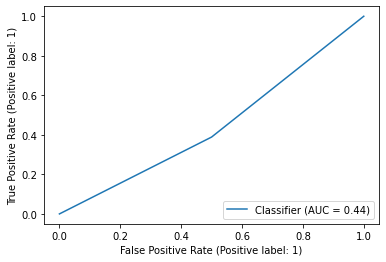

In [15]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_val, yv_predict)

* For Logistic Regression Classifier, we obtain training accuracy of 53.36% whereas the validation accuracy is 44.12% which is very poor. This indicates there is some degree of over-fitting. `Precision`,`recall` and `F1-score` are very similar. Looking at the ROC graph we can see that its below the line `y=x` and also the `AUC score` is just 0.44.

* Overall, Logistic Regression does a very poor job in classifying the unseen samples.

# ii) K-Nearest Neighbours(KNN)

* To find the best value of K that would give us the highest validation accuracy we used a for-loop and in each iteration we incremented the value of K by 1 and we did this for 10 different K values. In each iteration we also appended validation accuracy to the empty list `validation_accuracy` and used it to plot the below graph.

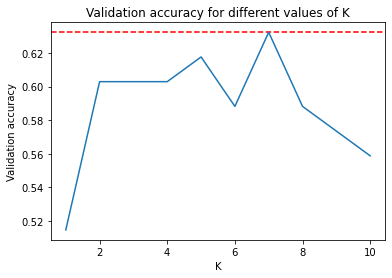

In [16]:
from sklearn.neighbors import KNeighborsClassifier
validation_accuracy=[] # empty list
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    validation_accuracy.append(knn.score(X_val_scaled,y_val)) # append the validation accuracy to the empty list above
    
x = [k for k in range(1,11)]
y = [i for i in validation_accuracy]
plt.xlabel("K")
plt.ylabel("Validation accuracy")
plt.title("Validation accuracy for different values of K")
plt.axhline(y = max(validation_accuracy), color='red', linestyle='--')
plt.plot(x,y)
plt.show()

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('Training dataset accuracy: {0}.'.format(knn.score(X_train_scaled, y_train)))
print('Validation dataset accuracy: {0}.'.format(knn.score(X_val_scaled, y_val)))

yt_predict_knn = knn.predict(X_train_scaled)
yv_predict_knn = knn.predict(X_val_scaled)

Training dataset accuracy: 0.7649253731343284.
Validation dataset accuracy: 0.6323529411764706.


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

train_confusion_matrix = confusion_matrix(y_true = y_train, y_pred = yt_predict_knn)
val_confusion_matrix = confusion_matrix(y_true = y_val, y_pred = yv_predict_knn)

print('Training confusion matrix:\n {}\n'.format(train_confusion_matrix))

print()

print('Validation confusion matrix:\n {}\n'.format(val_confusion_matrix))

Training confusion matrix:
 [[ 98  34]
 [ 29 107]]


Validation confusion matrix:
 [[21 11]
 [14 22]]



In [20]:
tn,fp,fn,tp = confusion_matrix(y_true = y_val, y_pred = yv_predict_knn).ravel()
print("For the validation set, we obtained following:")
print("True Negative: ",  tn)
print("False Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ",  tp)

For the validation set, we obtained following:
True Negative:  21
False Positive:  11
False Negative:  14
True Positive:  22


In [21]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall,f1score, support =precision_recall_fscore_support(y_val,yv_predict_knn, average ="macro")
print("Precision: ",precision)
print("Recall: ", recall)
print("F1-score: ",f1score)

Precision:  0.6333333333333333
Recall:  0.6336805555555556
F1-score:  0.6322734155310404


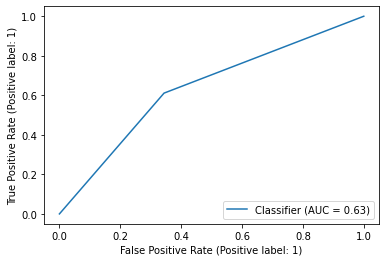

In [22]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_val, yv_predict_knn)

* For K-Nearest Neighbours Classifier, we obtain training accuracy of 76.49% whereas the validation accuracy is 63.24% which is poor. `Precision`,`recall` and `F1-score` are very similar. Although the ROC graph is above the line `y=x`, the `AUC score` is just 0.63 which is not a sign of a good classifier.


* Overall, KNN does also does a poor job in classifying the unseen samples but it performs better than Logistic Regression Classifier.

# iii) Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=150,max_features="auto",random_state=0)
RF.fit(X_train_scaled,y_train)

yt_predict_RF = RF.predict(X_train_scaled)
yv_predict_RF = RF.predict(X_val_scaled)


print("Training Accuracy :" ,RF.score(X_train_scaled,y_train))
print("Validation Accuracy :" ,RF.score(X_val_scaled,y_val))

Training Accuracy : 1.0
Validation Accuracy : 0.6617647058823529


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score

train_confusion_matrix = confusion_matrix(y_true = y_train, y_pred = yt_predict_RF)
val_confusion_matrix = confusion_matrix(y_true = y_val, y_pred = yv_predict_RF)

print('Training confusion matrix:\n {}\n'.format(train_confusion_matrix))

print()

print('Validation confusion matrix:\n {}\n'.format(val_confusion_matrix))


Training confusion matrix:
 [[132   0]
 [  0 136]]


Validation confusion matrix:
 [[19 13]
 [10 26]]



In [25]:
tn,fp,fn,tp = confusion_matrix(y_true = y_val, y_pred = yv_predict_RF).ravel()
print("For the validation set, we obtained following:")
print("True Negative: ",  tn)
print("False Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ",  tp)

For the validation set, we obtained following:
True Negative:  19
False Positive:  13
False Negative:  10
True Positive:  26


In [26]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall,f1score, support =precision_recall_fscore_support(y_val,yv_predict_RF, average ="macro")
print("Precision: ",precision)
print("Recall: ", recall)
print("F1-score: ",f1score)

Precision:  0.6609195402298851
Recall:  0.6579861111111112
F1-score:  0.6581420765027322


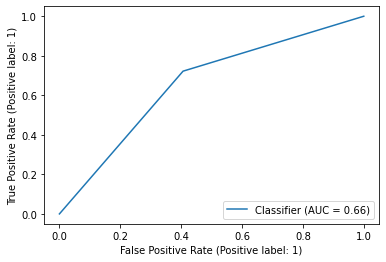

In [27]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_val, yv_predict_RF)

* For Random Forest Classifier, we obtain training accuracy of 100% whereas the validation accuracy is 66.18% . `Precision` is slighlty higher than `recall` since 26 `Potter` songs were correctly identified and `F1-score` is slightly higher than the `F1-score` obtained for KNN. The ROC graph is above the line `y=x`, with the `AUC score` of just 0.66 which is not a sign of a good classifier.


* Overall, Random Forest Classifier also does a poor job in classifying the unseen samples but in terms of performance and validation accuracy it is better than Logistic Regression Classifier and KNN.

* Now using pipeline,we will train the model on the training set(`X_train_val` and `y_train_val`) and will evaluate the deployment performance on the test set.

In [29]:
from sklearn.pipeline import Pipeline
RFC = RandomForestClassifier(n_estimators=150,max_features="auto",random_state=0)
pipe = Pipeline([("scaler",StandardScaler()),
                     ("classifier",RFC)
                    ])

pipe.fit(X_train_val,y_train_val)
pipe.score(X_test,y_test)

print("Training Accuracy :" ,pipe.score(X_train_val,y_train_val))
print("Test Accuracy :" ,pipe.score(X_test,y_test))

Training Accuracy : 1.0
Test Accuracy : 0.6071428571428571


# 9 Conclusions

Your conclusions, improvements, etc should go here

* We evaluated 3 classifiers which are `Logistic Regression classifier`, `K-Nearest Neighbour(KNN) classifier` and `Random Forest classifier`. We fitted all these model on the training set which consisted of 4 features extracted from 268 audio samples. We then validated the model by testing it on the validation set which consisted of 4 features extracted from 68 audio samples and we chose Random Forest classifier as it gave the highest validation accuracy.

* After that, we trained the Random Forest classifier on the 4 features that were extracted from the 80% of the original sample i.e 336 audio samples and finally tested the model on the test dataset which consisted of 4 features extracted from 84 audio samples, giving the `test accuracy` of `60.71% ` which is quite poor.

* One of the reason for such low accuracies can be that the four features are not highly significant in predicting the song. So we can improve the accuracies by adding more features such as `Zero Crossing Rate`, `Mel-Frequency Cepstral Coefficients(MFCC)` and `Tempo`. 

